# Dirac delta approximaton

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def plot_fun(fun, label: str, axis = None):
    x_vec = np.linspace(-5, 5, 200)
    if axis is None:
        fig = plt.figure()
        axis = fig.add_axes([0, 0, 1.5, 1])
    axis.plot(x_vec, fun(x_vec), label=label)
    axis.set_xlabel('x')
    axis.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid()

# Ti64 parameters
cp_g  = 11.3
cp_h  = 1130
rho_g = 44.1
rho_h = 4087

For a smooth transition between two phases we need a smooth Dirac delta approximation to spread interface quandities across the (non-zero) interface width. The Dirac delta approximation functions must fulfill the condition

$ \begin{align}
\int_{-\infty}^\infty \delta(x) \, dx = 1,
\end{align} $

where $x$ is the sigend distance to the interface.

In [2]:
def integrate_fun(fun):
    x_vec = np.linspace(-10, 10, 10_000)
    return np.trapz(fun(x_vec), x_vec)

As an indicator we use the smooth heaviside function $\varphi$ of the signed distance

$ \begin{align}
\varphi(x) = \frac{1}{2} \, ( 1 + \tanh(x) ),
\end{align} $

which is 0 in the gaseous phase and 1 in the heavy (liquid / solid) phase.

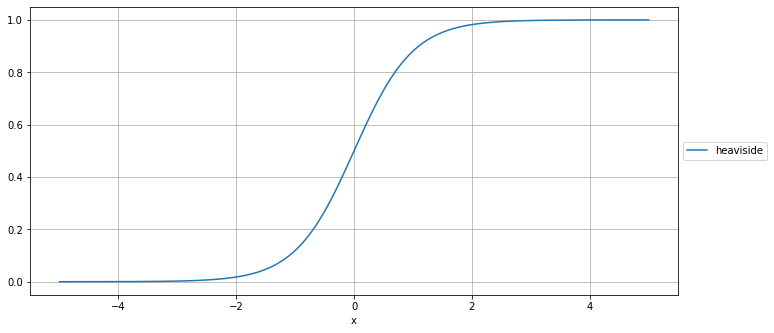

In [3]:
heaviside_fun = lambda x : 0.5 * (1 + np.tanh(x))

plot_fun(heaviside_fun, 'heaviside')

### Symmetric Dirac delta approximation

For a simple symmetric Dirac delta approximation we can use the norm of the indicator gradient:

$ \begin{align}
\delta(\vec{x}) =  ||\nabla \varphi(\vec{x})||
\end{align} $

When only considering a normal line through the interface with the skalar signed distance $x$, the symmetric Dirac delta approximation is equivalent to

$ \begin{align}
\delta(x) =  \varphi'(x) = \frac{1}{2} \, (1 - \tanh^2(x)),
\end{align} $

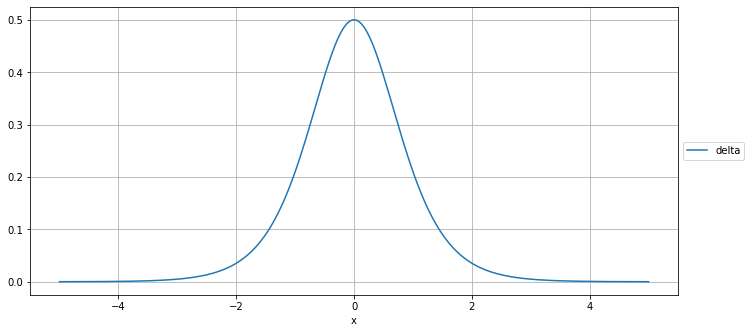

In [4]:
delta_fun = lambda x : 0.5 * (1 - np.tanh(x)**2);

plot_fun(delta_fun, 'delta')

which fulfills the condition above:

$ \begin{align}
\int_{-\infty}^\infty \delta(x) \, dx = \int_{-\infty}^\infty \varphi'(x) \, dx = \int_0^1 1 \, dx = 1
\end{align} $

In [5]:
print('delta integral = {:.3f}'.format(integrate_fun(delta_fun)))

delta integral = 1.000


### Phase weighted Dirac delta approximation

To scale the Dirac delta approximation distribution with a varying weight between the phases, we introduce the phase weighted Dirac delta approximation function

$ \begin{align}
\delta_w(x) = \delta(x) \, w(x) \, c_{\text{corr}},
\end{align} $

with the weight function

$ \begin{align}
w(x) = w_g \, (1 - \varphi(x)) + w_h \, \varphi(x),
\end{align} $

where $w_g$ and $w_h$ are the weights of the gaseous and the heavy phase, respectively.

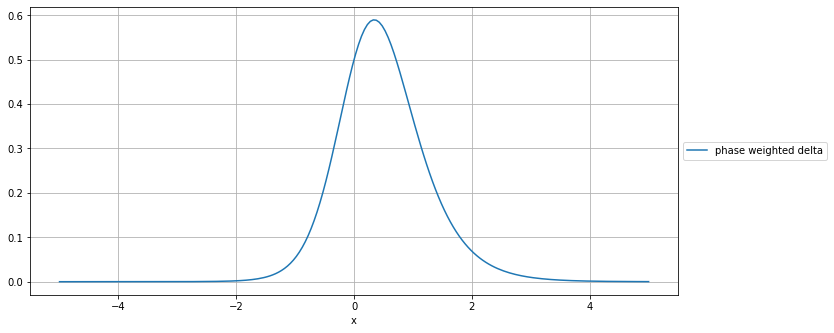

In [6]:
w_g = rho_g
w_h = rho_h

weight_fun = lambda phi : w_g * (1 - phi) + w_h * phi
c_corr = 2 / (w_g + w_h)

phase_weighted_delta_fun = lambda x : delta_fun(x) * weight_fun(heaviside_fun(x)) * c_corr

plot_fun(phase_weighted_delta_fun, 'phase weighted delta')

The correction factor $c_{\text{corr}}$ is determined to

$ \begin{align}
c_{\text{corr}} = \frac{2}{w_g + w_h}
\end{align} $

such that the phase weighted Dirac delta approximation function fulfills the condition above:

$ \begin{align}
\int_{-\infty}^\infty \delta_w(x) \, dx = c_{\text{corr}} \int_0^1 w(\varphi) \, d\varphi = 1
\end{align} $

In [7]:
print('phase weighted delta integral = {:.3f}'.format(integrate_fun(phase_weighted_delta_fun)))

phase weighted delta integral = 1.000


### Quadratic phase weighted Dirac delta approximation

To scale the Dirac delta approximation distribution with the square of a varying weight between the phases, we introduce the quadratic phase weighted Dirac delta approximation function

$ \begin{align}
\delta_{w^2}(x) = \delta(x) \, (w(x))^2 \, c_{\text{corr}},
\end{align} $

with the weight function

$ \begin{align}
w(x) = w_g \, (1 - \varphi(x)) + w_h \, \varphi(x),
\end{align} $

where $w_g$ and $w_h$ are the weights of the gaseous and the heavy phase, respectively.

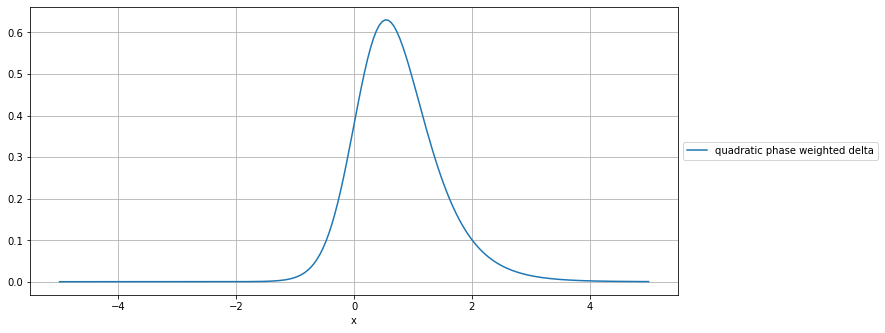

In [8]:
c_corr_quad = 3 / (w_g**2 + w_g*w_h + w_h**2)

quad_phase_weighted_delta_fun = lambda x : delta_fun(x) * weight_fun(heaviside_fun(x))**2 * c_corr_quad

plot_fun(quad_phase_weighted_delta_fun, 'quadratic phase weighted delta')

The correction factor $c_{\text{corr}}$ is determined to

$ \begin{align}
c_{\text{corr}} = \frac{3}{w_g^2 + w_g \, w_h + w_h^2}
\end{align} $

such that the quadratic phase weighted Dirac delta approximation function $\delta_{w^2}$ fulfills the condition above:

$ \begin{align}
\int_{-\infty}^\infty \delta_{w^2}(x) \, dx = c_{\text{corr}} \, \int_0^1 (w(\varphi))^2 \, d\varphi = 1
\end{align} $

In [9]:
print('quadratic phase weighted delta integral = {:.3f}'.format(integrate_fun(quad_phase_weighted_delta_fun)))

quadratic phase weighted delta integral = 1.000


### Double phase weighted Dirac delta approximation

To scale the Dirac delta approximation distribution with two individually varying weights between the phases, we introduce the phase weighted Dirac delta approximation function

$ \begin{align}
\delta_{ww}(x) = \delta(x) \, w_1(x) \, w_2(x) \, c_{\text{corr}}
\end{align} $

with the weight functions $w_i(x)$:

$ \begin{align}
w_i(x) = w_{i,g} \, (1 - \varphi(x)) + w_{i,h} \, \varphi(x), \quad i \in \{1, 2\}
\end{align} $

where $w_{i,g}$ and $w_{i,h}$ are the weights of the gaseous and the heavy phase, respectively.

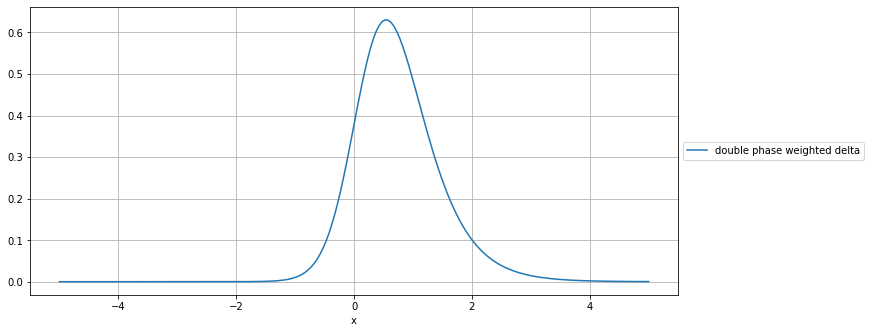

In [10]:
w_1g = rho_g
w_1h = rho_h
w_2g = cp_g
w_2h = cp_h

weight_fun_1 = lambda phi : w_1g * (1 - phi) + w_1h * phi
weight_fun_2 = lambda phi : w_2g * (1 - phi) + w_2h * phi
c_corr_double = 6 / (2*w_1g*w_2g + w_1g*w_2h + w_1h*w_2g + 2*w_1h*w_2h)

double_phase_weighted_delta_fun = lambda x : \
    delta_fun(x) * weight_fun_1(heaviside_fun(x)) * weight_fun_2(heaviside_fun(x)) * c_corr_double

plot_fun(double_phase_weighted_delta_fun, 'double phase weighted delta')

The correction factor $c_{\text{corr}}$ is determined to

$ \begin{align}
c_{\text{corr}} = \frac{6}{2 \, w_{1,g} \, w_{2,g} + w_{1,g} \, w_{2,h} + w_{1,h} \, w_{2,g} + 2 \, w_{1,h} \, w_{2,h}}
\end{align} $

such that the double phase weighted Dirac delta approximation function $\delta_{ww}$ fulfills the condition above:

$ \begin{align}
\int_{-\infty}^\infty \delta_{ww}(x) \, dx = c_{\text{corr}} \, \int_0^1 w_1(\varphi) w_2(\varphi) \, d\varphi = 1
\end{align} $

In [11]:
print('double phase weighted delta integral = {:.3f}'.format(integrate_fun(double_phase_weighted_delta_fun)))

double phase weighted delta integral = 1.000


#### Double phase weighted delta vs. quadratic phase weighted delta

Both $\delta_{w^2}(x)$ and $\delta_{ww}(x)$ are very similar, so the question arises, if $\delta_{ww}(x)$ can be replaced with $\delta_{w^2}(x)$ for any set of phase weights $w_{1,g}, w_{1,h}, w_{2,g}$ and $w_{2,h}$. Let's assume it can. Then, the (uncorrected) weight function

$ \begin{align}
w_{\text{double}}(\varphi) &= ( w_{1,g} \, (1 - \varphi) + w_{1,h} \, \varphi) \, ( w_{2,g} \, (1 - \varphi) + w_{2,h} \, \varphi) \\
&= w_{1,g}w_{2,g} \, (1 - \varphi)^2 + (w_{1,g}w_{2,h} + w_{1,h}w_{2,g}) \, \varphi (1 - \varphi) + w_{1,h}w_{2,h} \, \varphi^2
\end{align} $

can be expressed with the (uncorrected) quadratic weight function

$ \begin{align}
w_{\text{quad}}(\varphi) &= ( w_g \, (1 - \varphi) + w_h \, \varphi)^2 \\
&= w_g^2 \, (1 - \varphi)^2 + 2 w_g w_h \, \varphi (1 - \varphi) + w_h^2 \, \varphi^2
\end{align} $

with a set of weights $w_g$ and $w_h$. When equating $w_{\text{double}}(\varphi) = w_{\text{quad}}(\varphi)$ and comparing the coefficients to solve for $w_g$ and $w_h$ one ends up with the set equations

$ \begin{align}
w_g^2 &=  w_{1,g}w_{2,g} \\
2 w_g w_h &= w_{1,g}w_{2,h} + w_{1,h}w_{2,g} \\
w_h^2 &= w_{1,h}w_{2,h}
\end{align} $

which is impossible to solve for any choice of the weights $w_{1,g}, w_{1,h}, w_{2,g}$ and $w_{2,h}$. Thus, $\delta_{ww}(x)$ cannot be replaced with an equivalent $\delta_{w^2}(x)$.


**Note:** If both weights for each phase are the same, the double phase weighted Dirac delta function $\delta_{ww}$ is equal to the quadratic phase weighted Dirac delta function $\delta_{w^2}$.

### Reciprocal phase weighted Dirac delta approximation function

In the case of explicit modelling of evaporation, the density is interpolated across the interface by a reciprocal relation:

$ \begin{align}
\rho_{\text{r}}(\varphi) = \frac{1}{\frac{\varphi}{\rho_h} + \frac{1-\varphi}{\rho_g}}
\end{align} $

Here, $\rho_g$ and $\rho_h$ are the densities of the gaseous and the heavy phase, respectively.

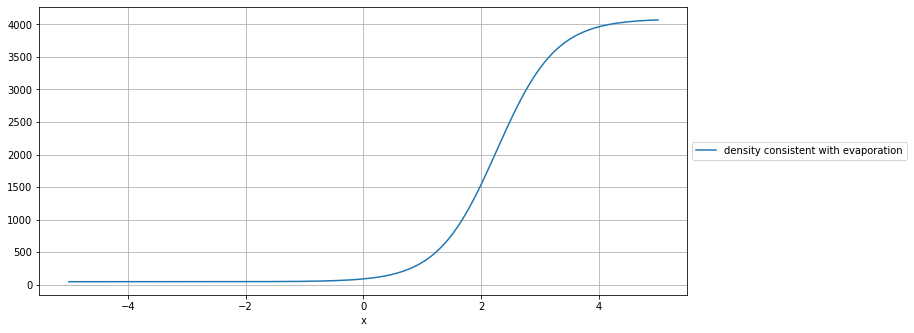

In [12]:
reciprocal_density_fun = lambda phi : 1 / ( phi / rho_h + (1 - phi) / rho_g )

plot_fun(lambda x : reciprocal_density_fun(heaviside_fun(x)), 'density consistent with evaporation')

With the reciprocal phase weighted Dirac delta approximation, interface forces can be weighted proportional to the reciprocal interpolation:

$ \begin{align}
\delta_{\text{r}}(x) = \delta(x) \, w_{\text{r}}(\varphi(x)) \, c_{\text{corr}}
\end{align} $

Here, $\delta(x)$ is the symmetric delta function as defined above, the reciprocal weight function $w_\text{r}$ is defined analogously to the reciprocal density interpolation

$ \begin{align}
    w_\text{r}(\varphi) = \frac{1}{\frac{1 - \varphi}{w_g} + \frac{\varphi}{w_h}}
\end{align} $

and the correction factor $c_{\text{corr}}$ is determined to

$ \begin{align}
c_{\text{corr}} = \frac{w_g - w_h}{w_g \, w_h \, \ln{\frac{w_g}{w_h}}}, \quad \text{for} \, w_g > 0 \, \wedge \, w_h > 0 \, \wedge \, w_g \neq w_h
\end{align} $

such that the reciprocal phase weighted Dirac delta approximation function $\delta_{\text{r}}$ fulfills the condition:

$ \begin{align}
\int_{-\infty}^\infty \delta_{\rho,\text{evapor}}(x) \, dx = 1
\end{align} $

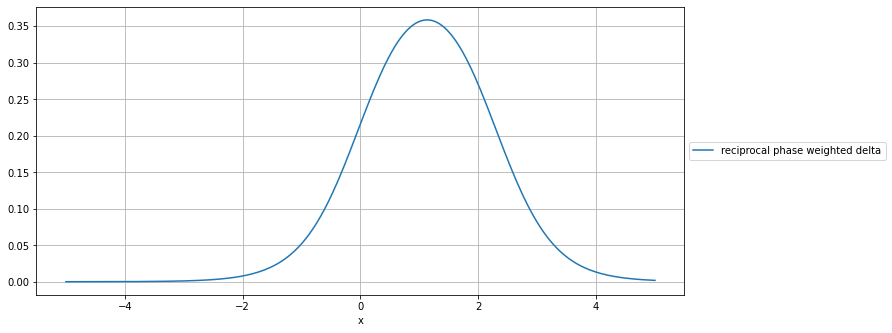

In [13]:
w_g = rho_g
w_h = rho_h

reciprocal_weight_fun = lambda phi : 1 / ( phi / w_h + (1 - phi) / w_g )

c_corr_reciprocal = (w_g - w_h) / (w_g * w_h * np.log(w_g/w_h))

delta_reciprocal_fun = lambda x : delta_fun(x) * reciprocal_weight_fun(heaviside_fun(x)) * c_corr_reciprocal

plot_fun(delta_reciprocal_fun, 'reciprocal phase weighted delta')

In [14]:
print('Ok!' if w_g > 0 else 'gas weight must be positive!')
print('Ok!' if w_h > 0 else 'liquid weight must be positive!')
print('Ok!' if w_g != w_h else 'weights must differ!')

print('reciprocal phase weighted delta integral = {:.3f}'
      .format(integrate_fun(delta_reciprocal_fun)))

Ok!
Ok!
Ok!
reciprocal phase weighted delta integral = 1.000


### Reciprocal and heaviside phase weighted Dirac delta approximation function

To weigh an interface force with a reciprocal and an additional weight the following Dirac delta approximation function can be used:

$ \begin{align}
    \delta_{\text{r},\text{w}}(x) = \delta(x) \, w_\text{r}(\varphi(x)) \, w(\varphi(x)) \, C_{\text{corr}}
\end{align} $

Here, $\delta(x)$ is the symmetric delta function as defined above, the reciprocal weight function $w_\text{r}(\varphi)$ is defined as

$ \begin{align}
    w_\text{r}(\varphi) = \frac{1}{\frac{1 - \varphi}{w_{\text{r},g}} + \frac{\varphi}{w_{\text{r},h}}},
\end{align} $

the usual weigh function $w(\phi)$ is defined as 

$ \begin{align}
    w(\varphi) = (1 - \varphi) \, w_{\text{r},g} + \varphi \, w_{\text{r},h},
\end{align} $

and the correction factor $C_{\text{corr}}$ is determined to 

$ \begin{align}
    C_{\text{corr}} = \left(w_g \, \frac{w_{\text{r},g} \, w_{\text{r},h} \, \ln{\frac{w_{\text{r},g}}{w_{\text{r},h}}}}{w_{\text{r},g} - w_{\text{r},h}} + (w_h - w_g) \, \frac{\frac{1}{w_{\text{r},g}} \, \left( \ln{\frac{w_{\text{r},h}}{w_{\text{r},g}}} - 1 \right) + \frac{1}{w_{\text{r},h}}}{\left( \frac{1}{w_{\text{r},h}} - \frac{1}{w_{\text{r},g}} \right)^2} \right)^{-1} \\
    \text{for} \, w_{\text{r},g} > 0 \wedge w_{\text{r},g} > 0 \wedge w_{\text{r},g} \neq w_{\text{r},g} \nonumber
\end{align} $

such that $\delta_{\text{r},\text{w}}$ fulfills the condition:

$ \begin{align}
\int_{-\infty}^\infty \delta_{\text{r},\text{w}}(x) \, dx = 1
\end{align} $

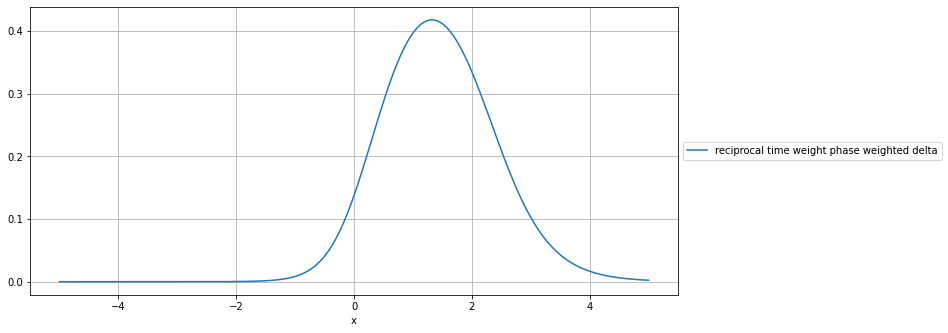

In [15]:
w_1g = rho_g
w_1h = rho_h
w_2g = cp_g
w_2h = cp_h

reciprocal_weight_fun = lambda phi : 1 / ( phi / w_1h + (1 - phi) / w_1g )

second_weight_fun = lambda phi : w_2g * (1 - phi) + w_2h * phi

c_corr_reciprocal_times_weight = 1 / ( \
    w_2g * w_1g * w_1h * np.log(w_1g / w_1h) / ( w_1g - w_1h ) \
    + ( w_2h - w_2g ) * ( 1/w_1g * ( np.log(w_1h / w_1g) - 1 ) + 1/w_1h ) / ( 1/w_1h - 1/w_1g )**2 )

delta_reciprocal_times_weight_fun = lambda x : \
    delta_fun(x) * reciprocal_weight_fun(heaviside_fun(x)) \
    * second_weight_fun(heaviside_fun(x)) * c_corr_reciprocal_times_weight

plot_fun(delta_reciprocal_times_weight_fun, 'reciprocal time weight phase weighted delta')

In [16]:
print('Ok!' if rho_g > 0 else 'gas density must be positive!')
print('Ok!' if rho_h > 0 else 'liquid density must be positive!')
print('Ok!' if rho_g != rho_h else 'densities must differ!')

print('reciprocal times weight phase weighted delta integral = {:.3f}'
      .format(integrate_fun(delta_reciprocal_times_weight_fun)))

Ok!
Ok!
Ok!
reciprocal times weight phase weighted delta integral = 1.000


### Comparison

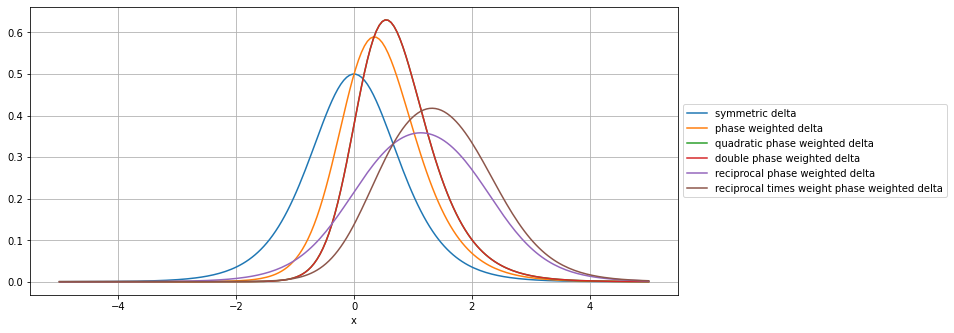

In [17]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1.5, 1])

plot_fun(delta_fun, 'symmetric delta', axis = ax)
plot_fun(phase_weighted_delta_fun, 'phase weighted delta', axis = ax)
plot_fun(quad_phase_weighted_delta_fun, 'quadratic phase weighted delta', axis = ax)
plot_fun(double_phase_weighted_delta_fun, 'double phase weighted delta', axis = ax)
plot_fun(delta_reciprocal_fun, 'reciprocal phase weighted delta', axis = ax)
plot_fun(delta_reciprocal_times_weight_fun, 
         'reciprocal times weight phase weighted delta', axis = ax)

plt.grid()